# Customer churn Rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3869,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.7,No
6059,7325-ENZFI,Female,0,No,No,39,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),40.30,1630.4,No
6615,8344-WFMFH,Male,0,No,Yes,9,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,50.10,484.05,No
1870,3566-HJGPK,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.55,45.55,No
6110,5438-QMDDL,Female,0,Yes,No,19,Yes,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Description
Data is having 7043 entries, 0 to 7042

Data having 21 columns and 7043 Rows

All the columns are having 7043 Non-Null value, means data is not having any null values.

Out of 21 columns we have 1 float, 2 int64 and 18 Object type values.

memory usage: 1.1+ MB

Here we can see Totalcharges is object type, but the values are float. It might be possible we have space in isnsted of value we will check where data having space or not.

# Attribute Information:
customerID : Unique Id of Customer , object

gender : Gender of the customer, object

SeniorCitizen : Where customer is a SeniorCitizen or not, int

Partner : Where customer having Partner or not object

Dependents : Where customer having Dependents

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer


## Taget Column: Churn : Whether the customer churned or not (Yes or No)


# Checking null values

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luclkiy we are not having any Null values


In [8]:
data.duplicated().sum()

0

Checkign any space values filled in the columns

In [9]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Data is gaving 11 value which are filled with space character.

In [10]:
data.replace(to_replace=" ", value=np.nan, inplace= True)
data =data.dropna()
data.drop('customerID', axis=1, inplace= True)


In [11]:
data['TotalCharges']=data.TotalCharges.astype(float)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Here we can see a strong correlation of tenure, monthlycharges with TotalCharges.

# Data analysis and Visualization
## Univariate Analysis
Here We will analyse the distribution of our data columns.
before analysing lets divide dataset in categorical and numerical columns.

In [13]:
cat_feature= data.select_dtypes(include=[np.object])


Lets first analyse the churn percentage, we will analyse this using pi chart.


Text(0.5, 1.0, 'Percentage of Customer Churn ')

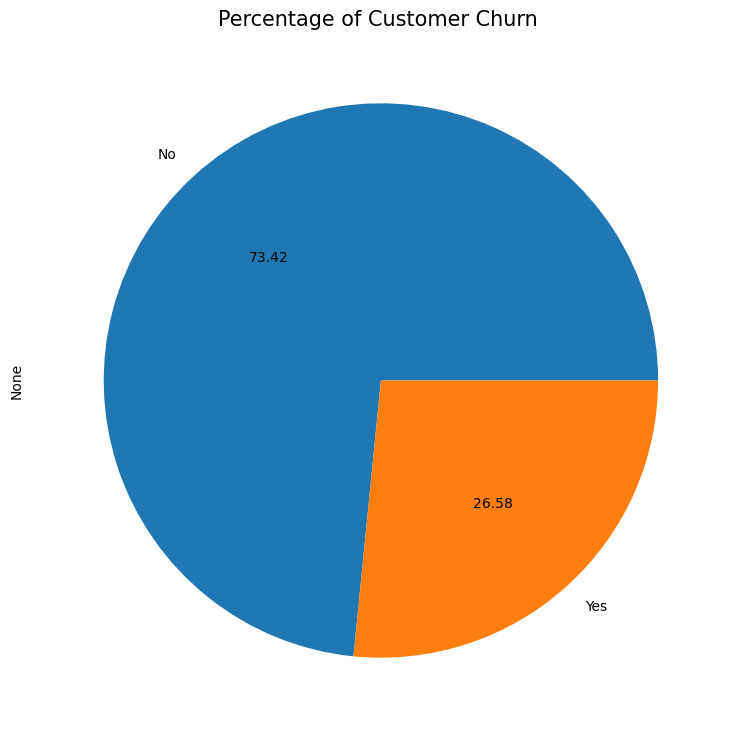

In [14]:

plt.figure(figsize=(15,9))
cat_feature.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of Customer Churn ", fontsize =15)

Here we can see 26.58 percentage of Customer are not satisfied with the company and dont wanted to contineu with company.

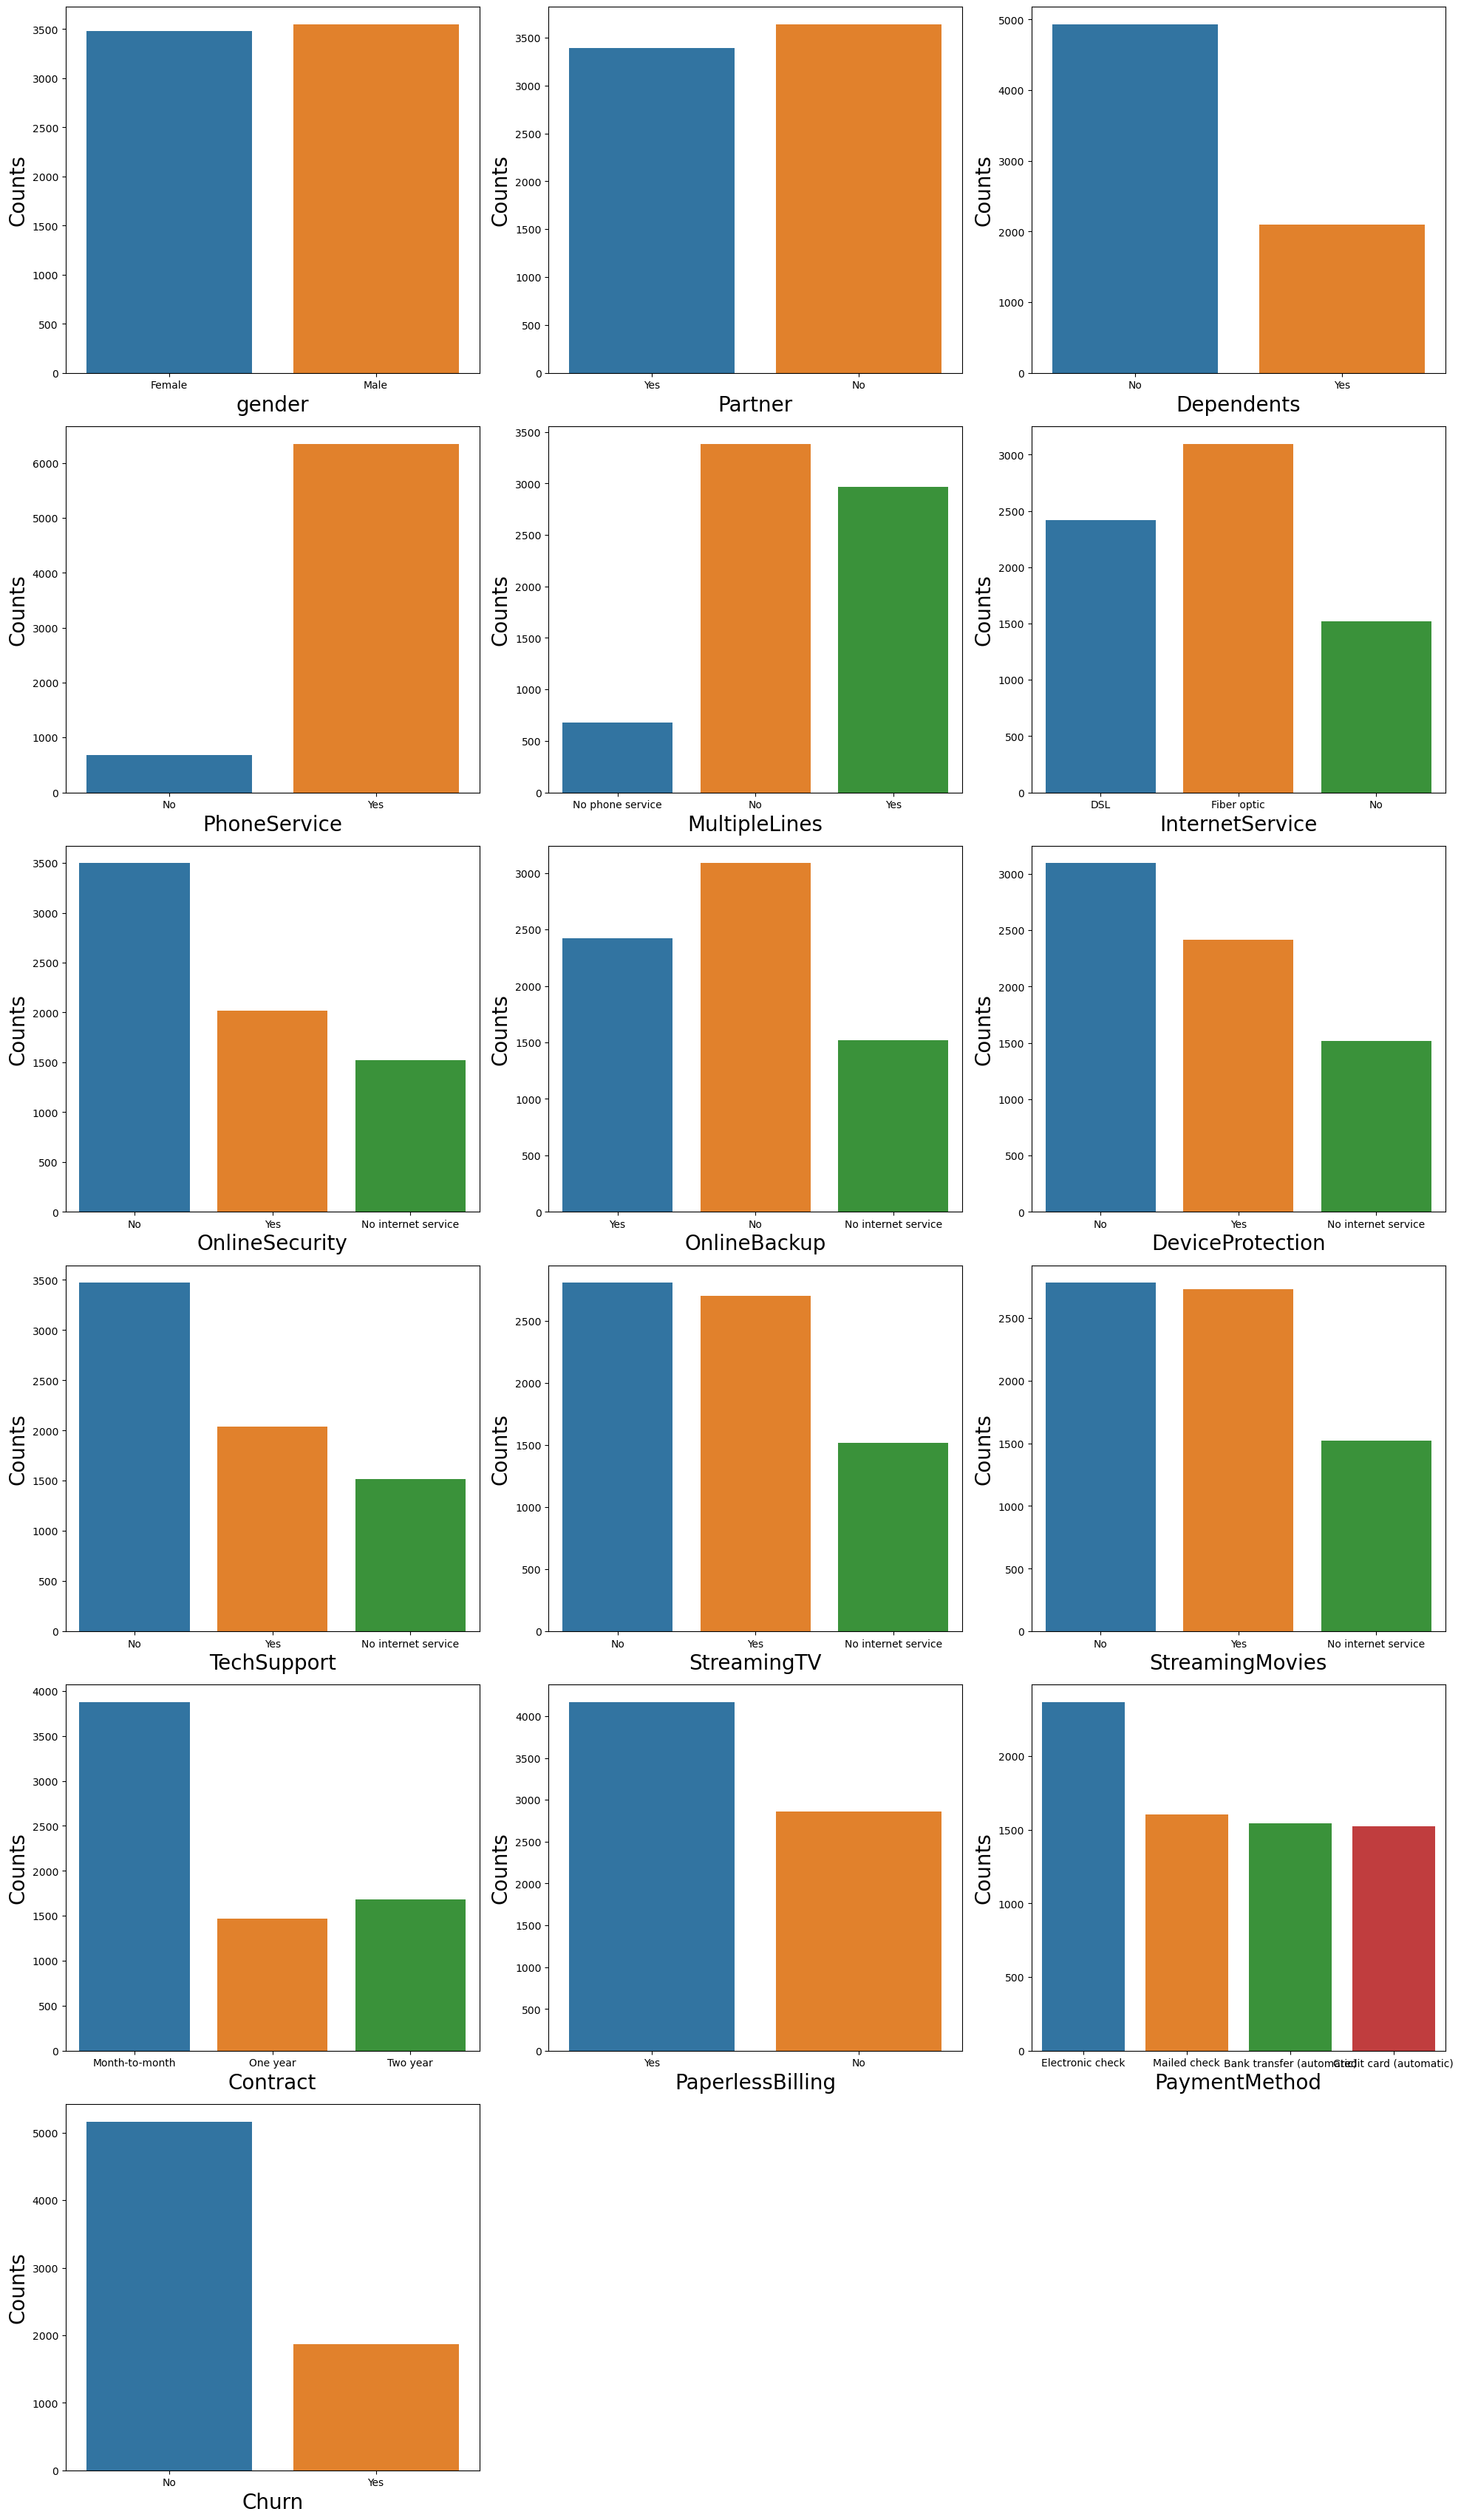

In [15]:
plt.figure(figsize=(20,45))
plotnumber= 1

for column in cat_feature:
    if plotnumber<=17:
        ax= plt.subplot(8,3, plotnumber)
        sns.countplot(x=cat_feature[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

1 Gender : No of males and females are almost equal

2 Partner: Count for having partner is less as compare to without partner

3 Dependents : Near about 70 percent customers are not having any Dependent

4 PhoneService : More than 90 percent customers have PhoneService

5 MultipleLines : More than 48 percent customer not having multiple lines

6 InternetService : For More than 44 percent customers internet service provider is Fiber Optics

7 OnlineSecurity: 49 percent customers are not having Online Security

8 OnlineBackup: More than 43 customers Not having online backup

9 DeviceProtection : More than 43 customers are not having Device Protection

10 TechSupport: 49 percent customers are not having any technical support

11 StreamingTV : The count for Streaming TV and Not Streaming TV are almost same

12 StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same

13 Contract : More than 55 percent of the cutmores are having month-to-month contract

14 PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling

15 PaperlessBilling : Most of the customers are using Electronic check

16 Churn : 26 percent customer out 100 are churned.


In [16]:
num_feature= data.select_dtypes(include=[np.number])


Text(0.5, 1.0, 'Percentage SeniorCitizen')

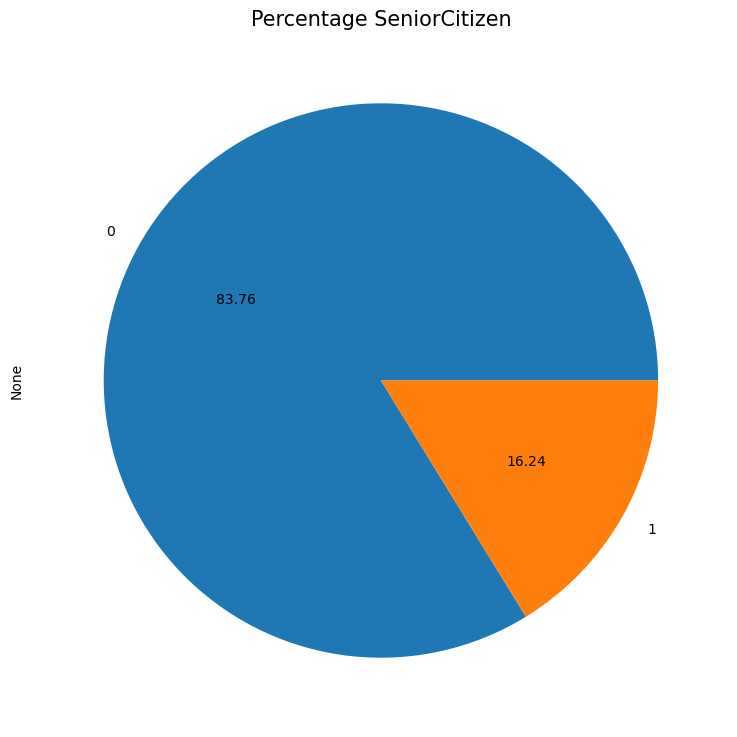

In [17]:
plt.figure(figsize=(15,9))
num_feature.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage SeniorCitizen", fontsize =15)

83.76 percent of customers are not senior Citizen

Text(0.5, 1.0, 'tenure')

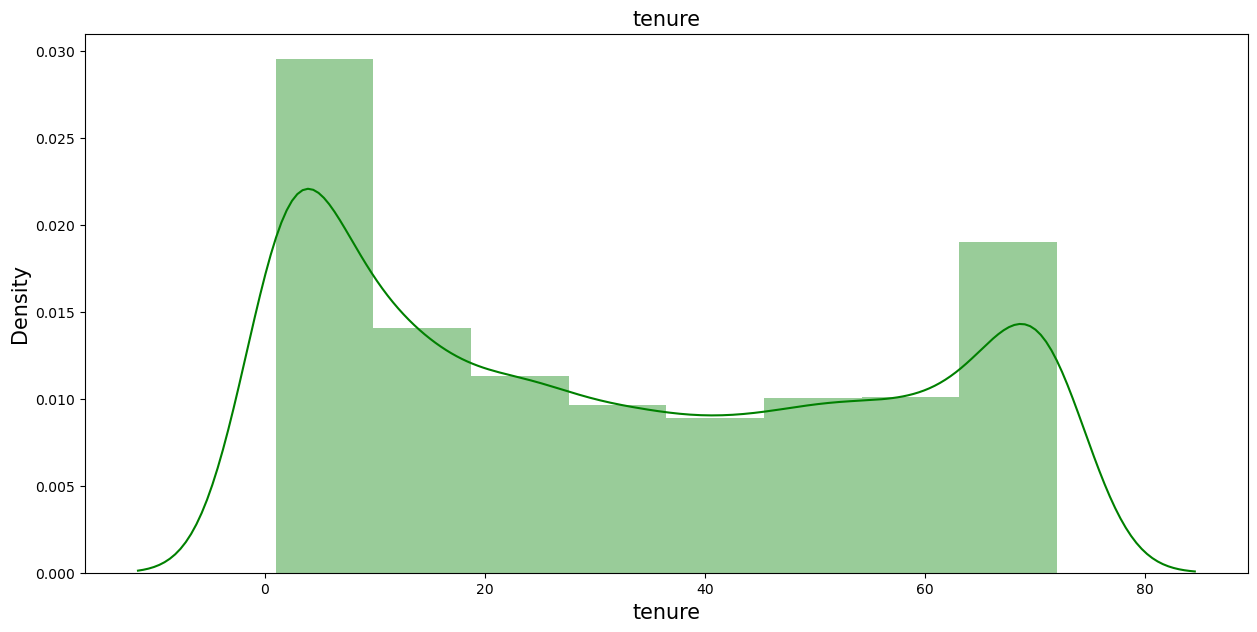

In [18]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['tenure'], bins= 8, color='g')
plt.xlabel('tenure', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('tenure', fontsize=15)

Here we can see the probablity to have tenure 0-10 and more than 60 is more.

Text(0.5, 1.0, 'MonthlyCharges')

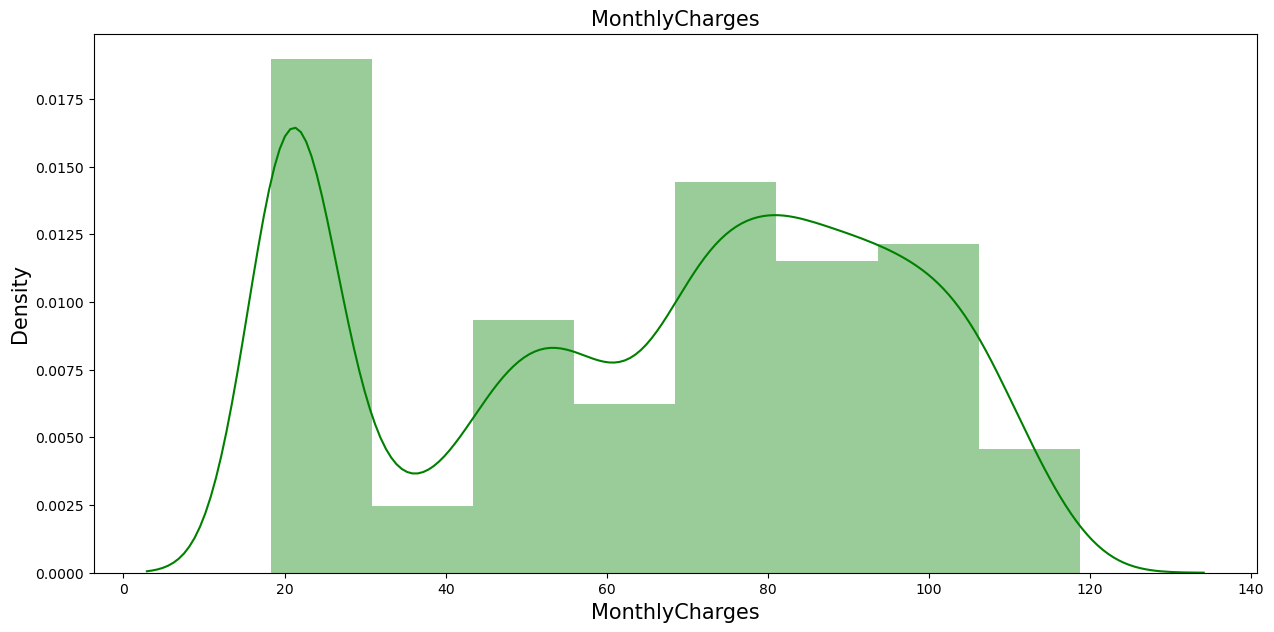

In [19]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['MonthlyCharges'], bins= 8, color='g')
plt.xlabel('MonthlyCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('MonthlyCharges', fontsize=15)

Chance of customers having monthly cahrge in the range of 70 to 100, is more as compare to other charges.

Text(0.5, 1.0, 'TotalCharges')

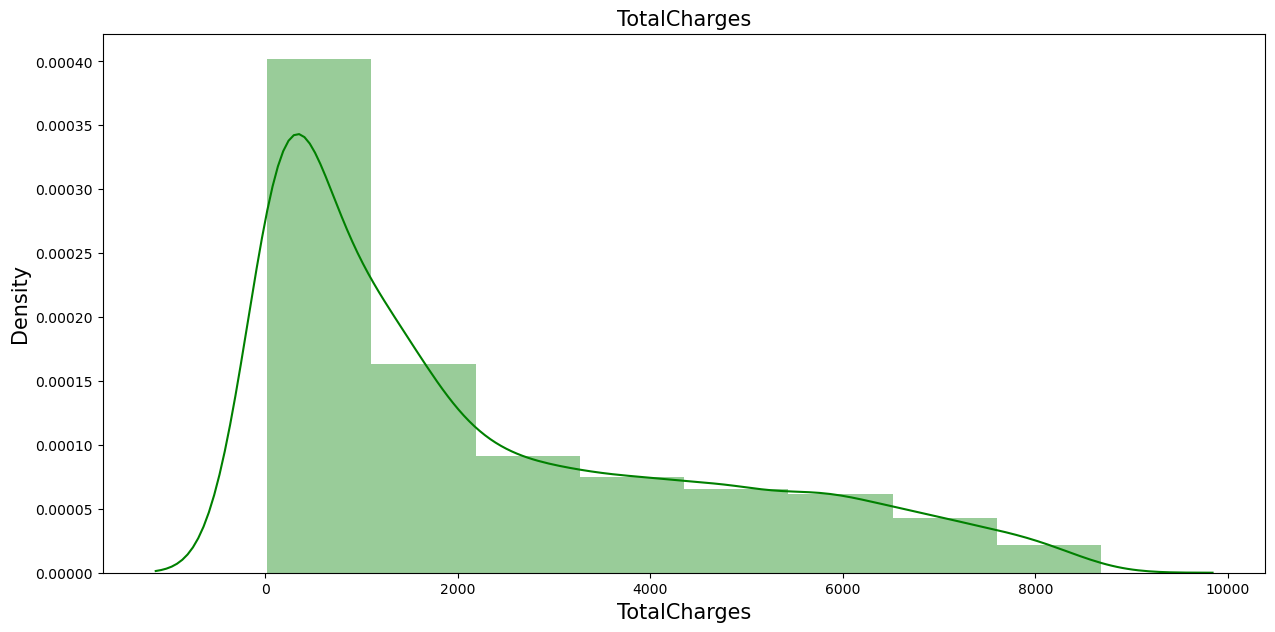

In [20]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['TotalCharges'], bins= 8, color='g')
plt.xlabel('TotalCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('TotalCharges', fontsize=15)

Here we can see skewness present in the Total charge column, customers in the range 0 to 2000 are more.

# Bivariate analysis
Here we analyse our feature columns with respect to churn which our target variable.

In [21]:
for col in cat_feature:
    print('\n%s column: '%col)
    print(cat_feature[col].value_counts(),'\n'),
    print('='*30)


gender column: 
Male      3549
Female    3483
Name: gender, dtype: int64 


Partner column: 
No     3639
Yes    3393
Name: Partner, dtype: int64 


Dependents column: 
No     4933
Yes    2099
Name: Dependents, dtype: int64 


PhoneService column: 
Yes    6352
No      680
Name: PhoneService, dtype: int64 


MultipleLines column: 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


InternetService column: 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


OnlineSecurity column: 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup column: 
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection column: 
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int

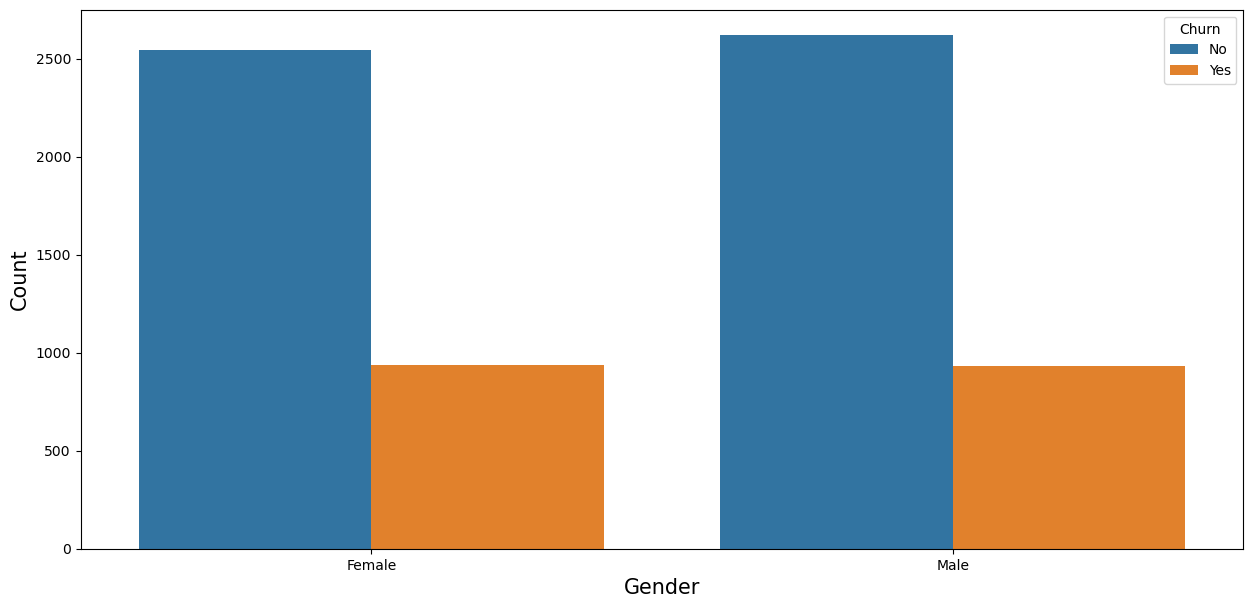

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['gender'], hue='Churn', data= data)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

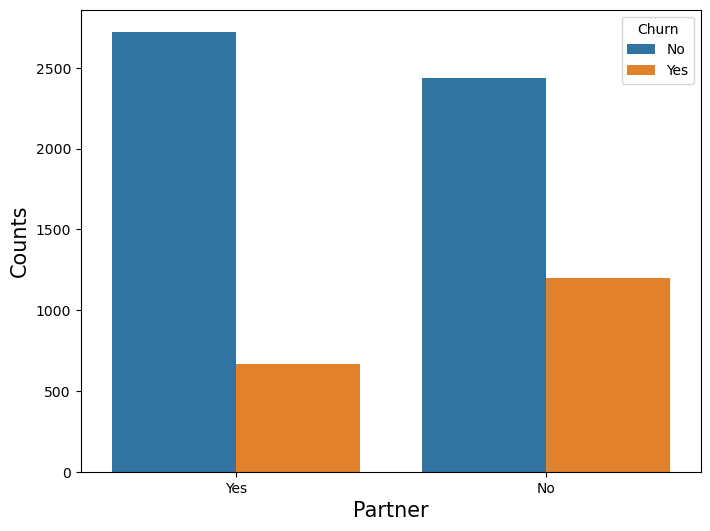

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data= cat_feature, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Here we can see the customers not having partners are more likely to churn.

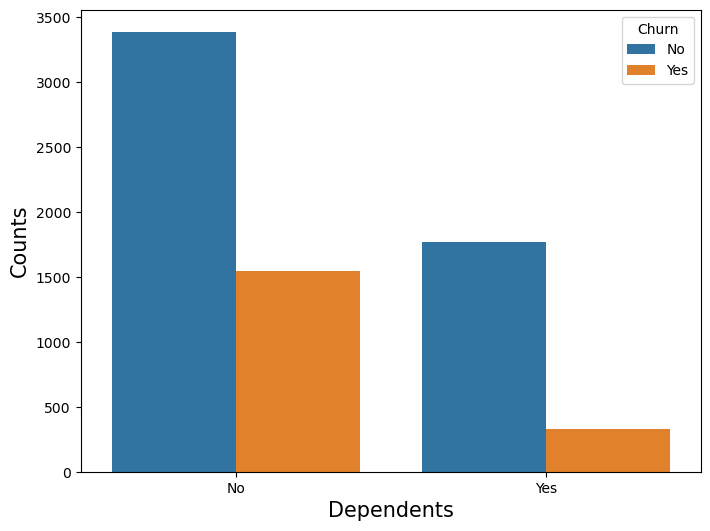

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data= cat_feature, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Churn for customers not having any dependent is more as compare to customers having dependent.

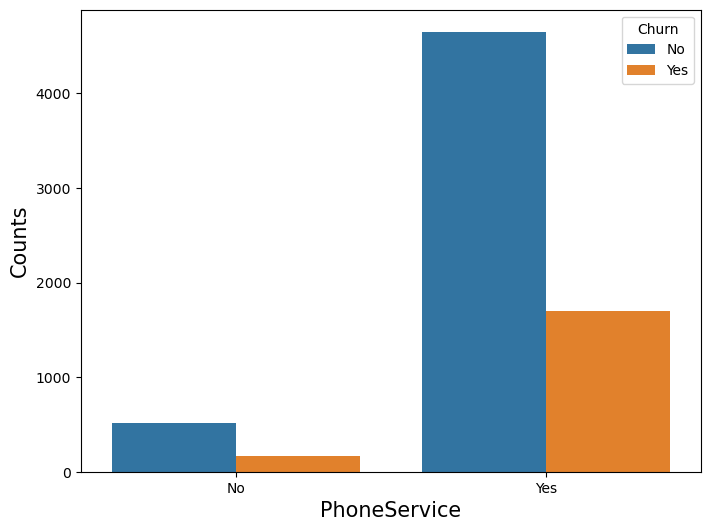

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data= cat_feature, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having phone service are more likely to churn

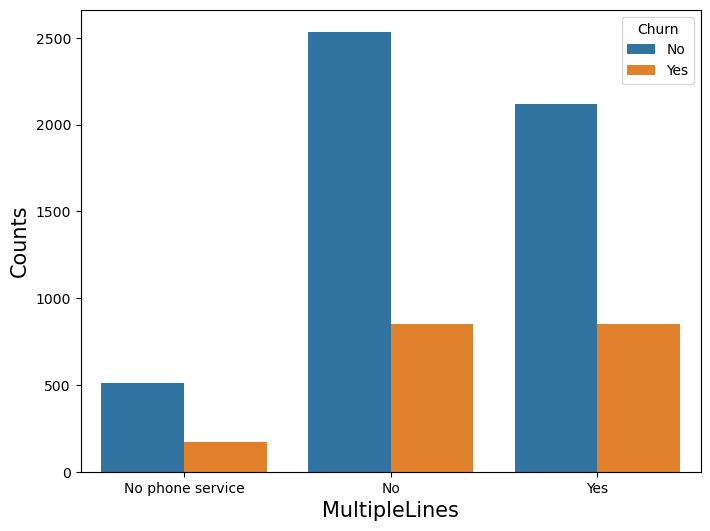

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data= cat_feature, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having multiple lines are more likely to churn.

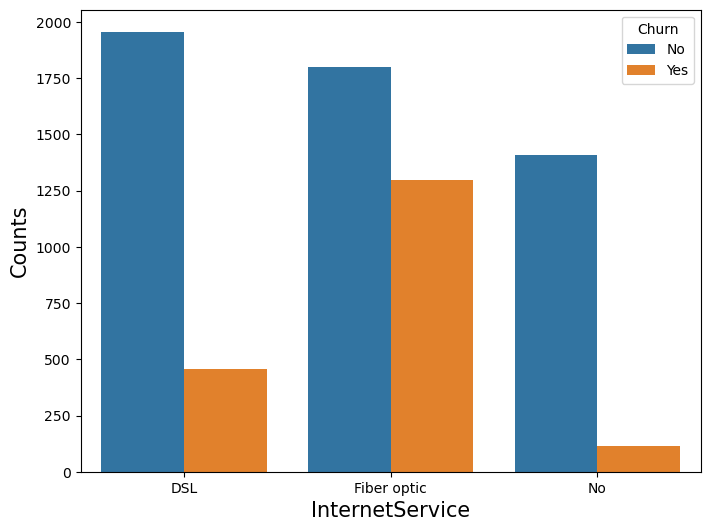

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data= cat_feature, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers option for fiber optics internet service are more likely to churn.

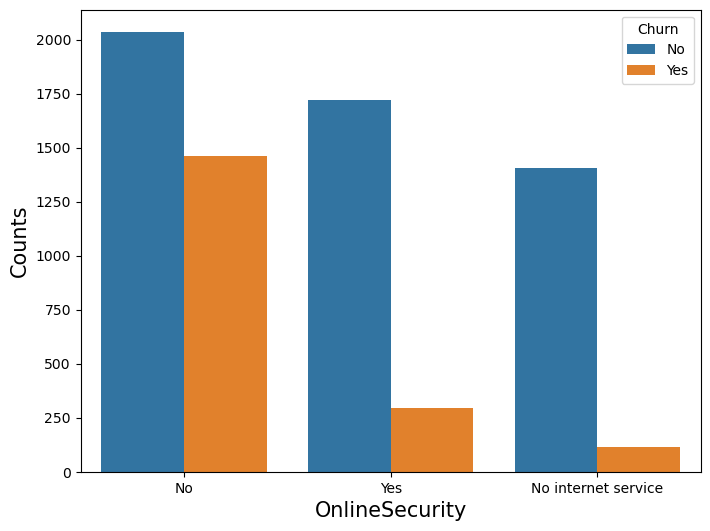

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data= cat_feature, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Online security are more likely, to churn.


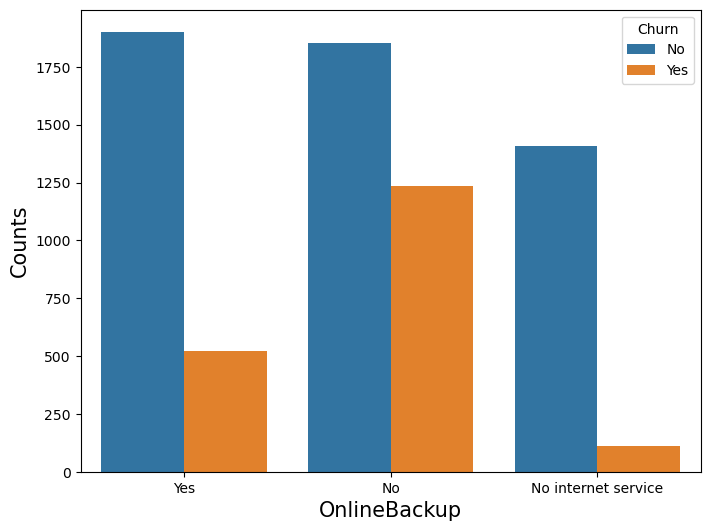

In [29]:

plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data= cat_feature, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


Customers not having online backup are more likely to churn.

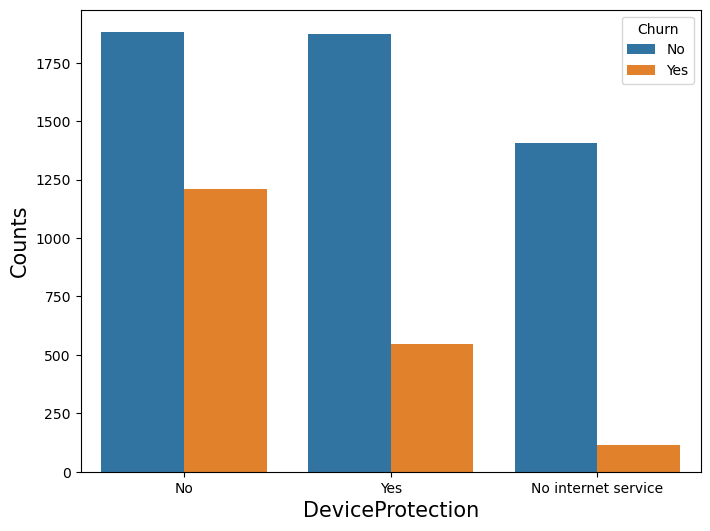

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data= cat_feature, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Device Protection are more likly to churn.

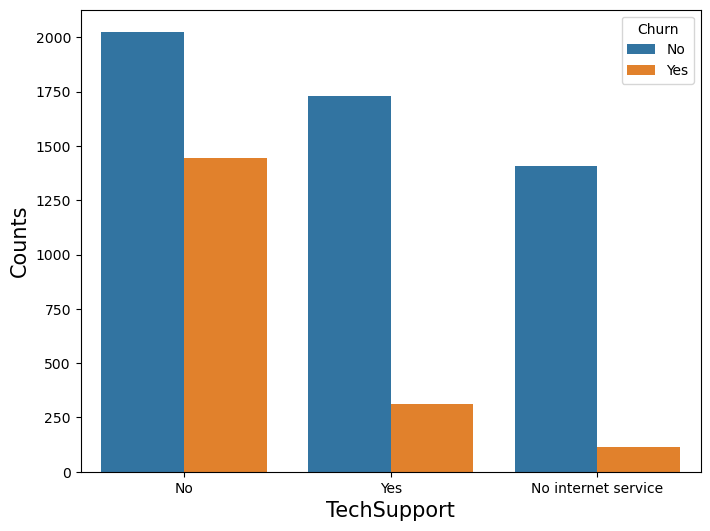

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data= cat_feature, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers without any Technical support are more likely to churn

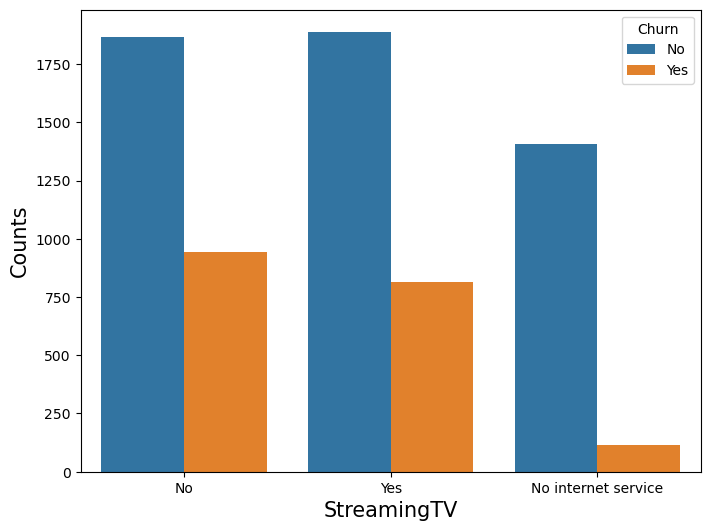

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data= cat_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming TV are more likely to churn.

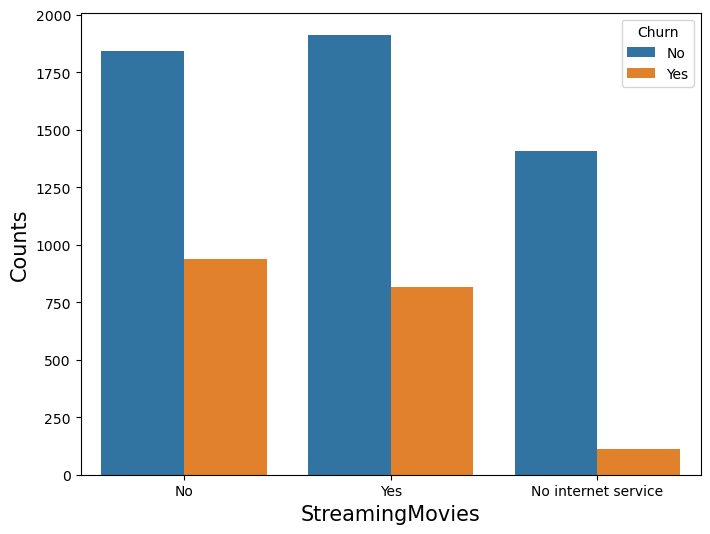

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data= cat_feature, hue='Churn')
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming Movies are more likely to churn.

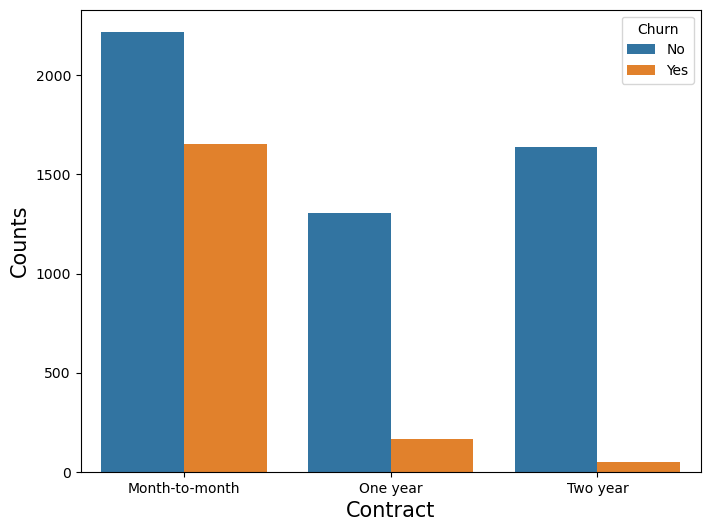

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data= cat_feature, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Month to month Contract are more likely to churn.

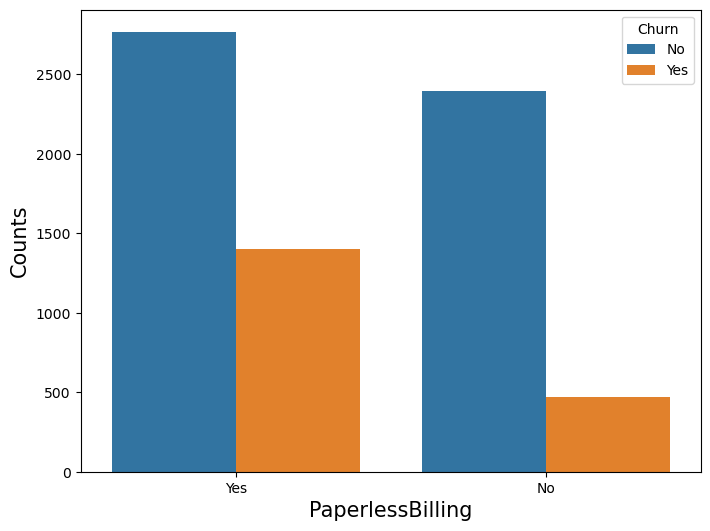

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data= cat_feature, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Paperless Billing are more likely to churn.

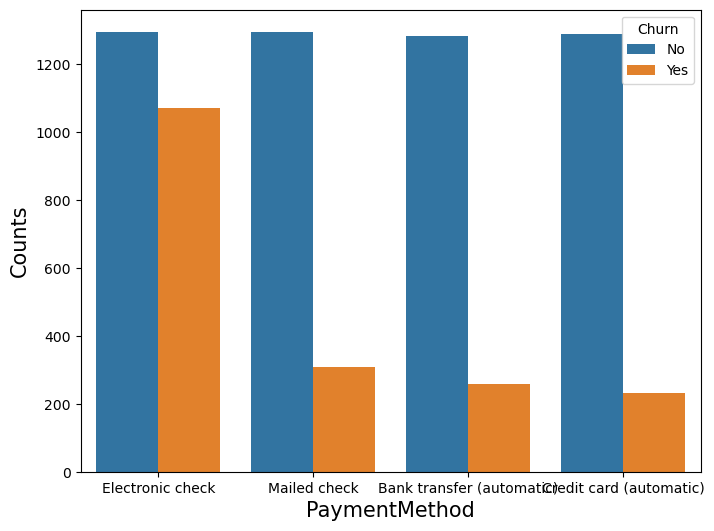

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data= cat_feature, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Electronucs Payment method are more likely to churn.

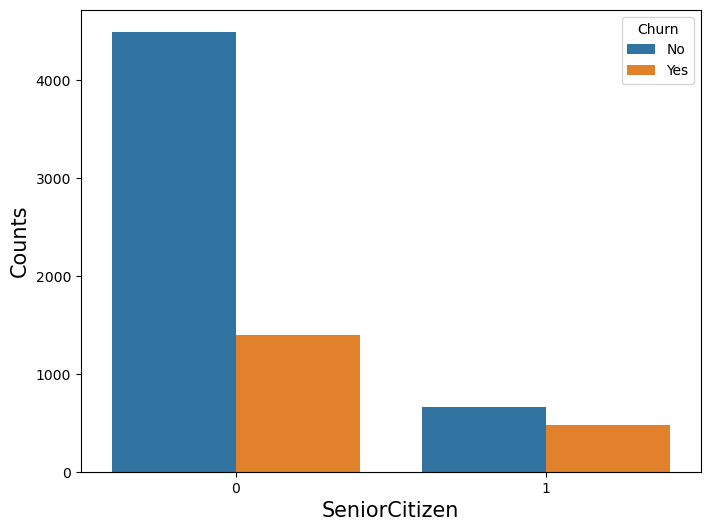

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data= data, hue='Churn')
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

CUstomers who are not Senior Citizen are more likely to churn.

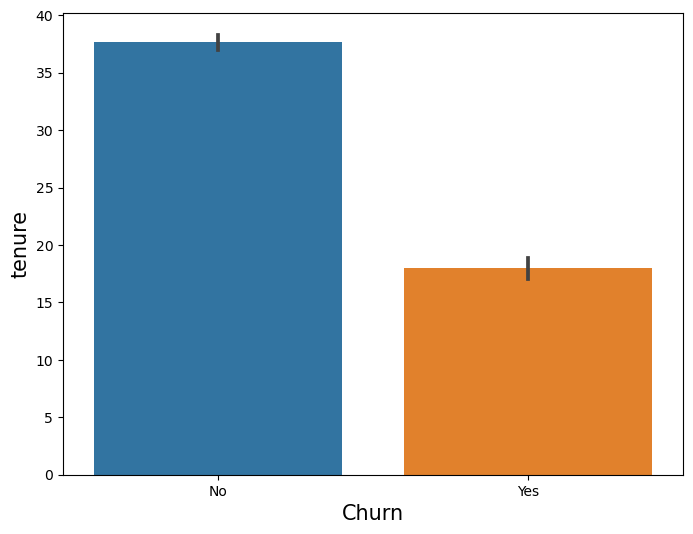

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Bar Plot indiactes Higher the tenure Chance of churn is less.

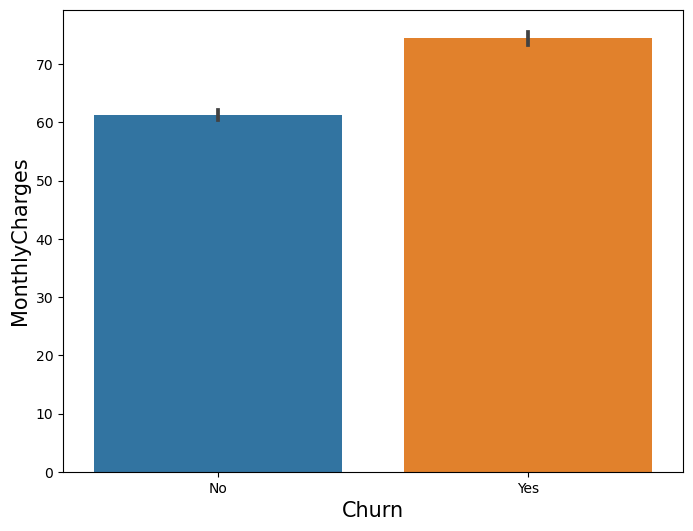

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(y='MonthlyCharges', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('MonthlyCharges', fontsize=15)
plt.show()

Higher the monthly charges Higher the chance to Churn.

# Multivariate Analysis

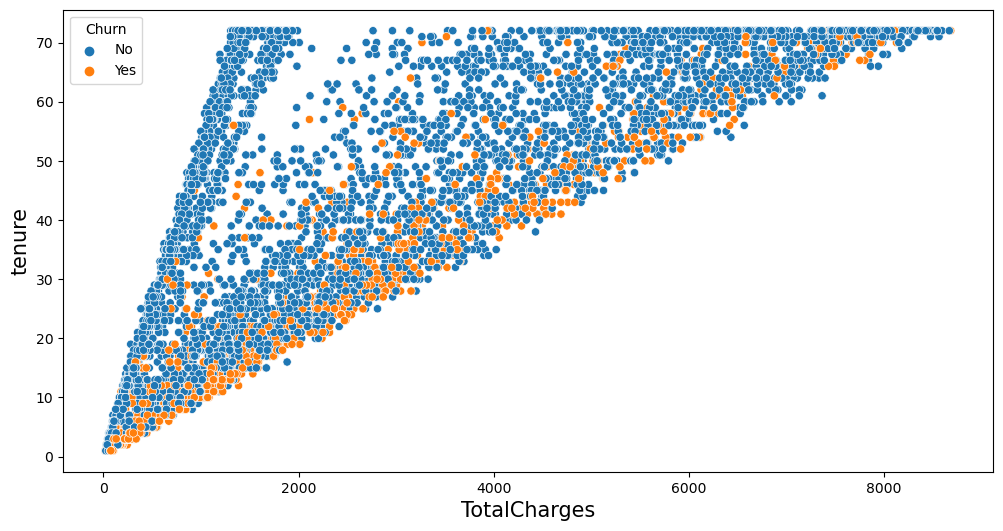

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['TotalCharges'], y=data['tenure'], hue='Churn', data=data)
plt.xlabel('TotalCharges', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Here we can see as the tenure and toatl charge increase, chance of churn is less.

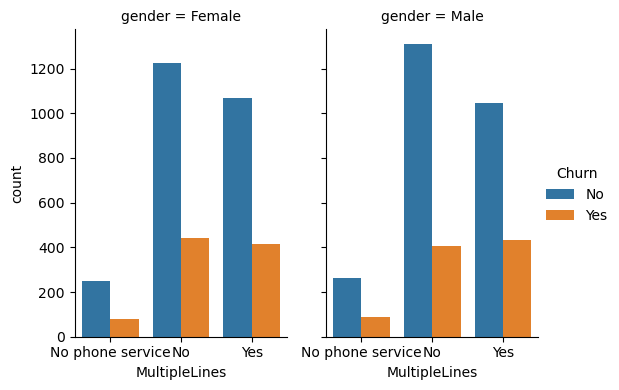

In [41]:
sns.catplot(x="MultipleLines", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

Churn for male and female are same in Multiline survice.

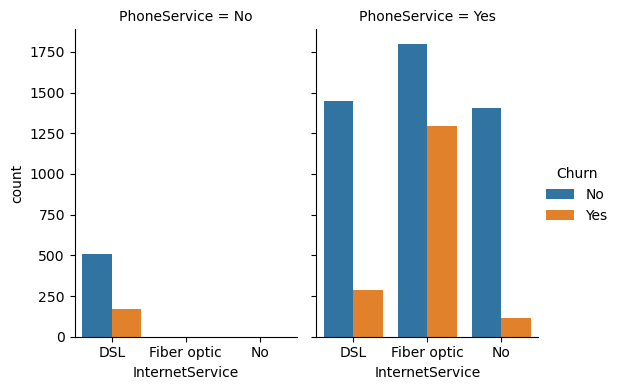

In [42]:
sns.catplot(x="InternetService", hue="Churn", col="PhoneService",data=data, kind="count",height=4, aspect=.7)

Here we can see pepole using phine service also use internet service,

And Customer with Fiber Optics Internet Service are more likely to Churn.

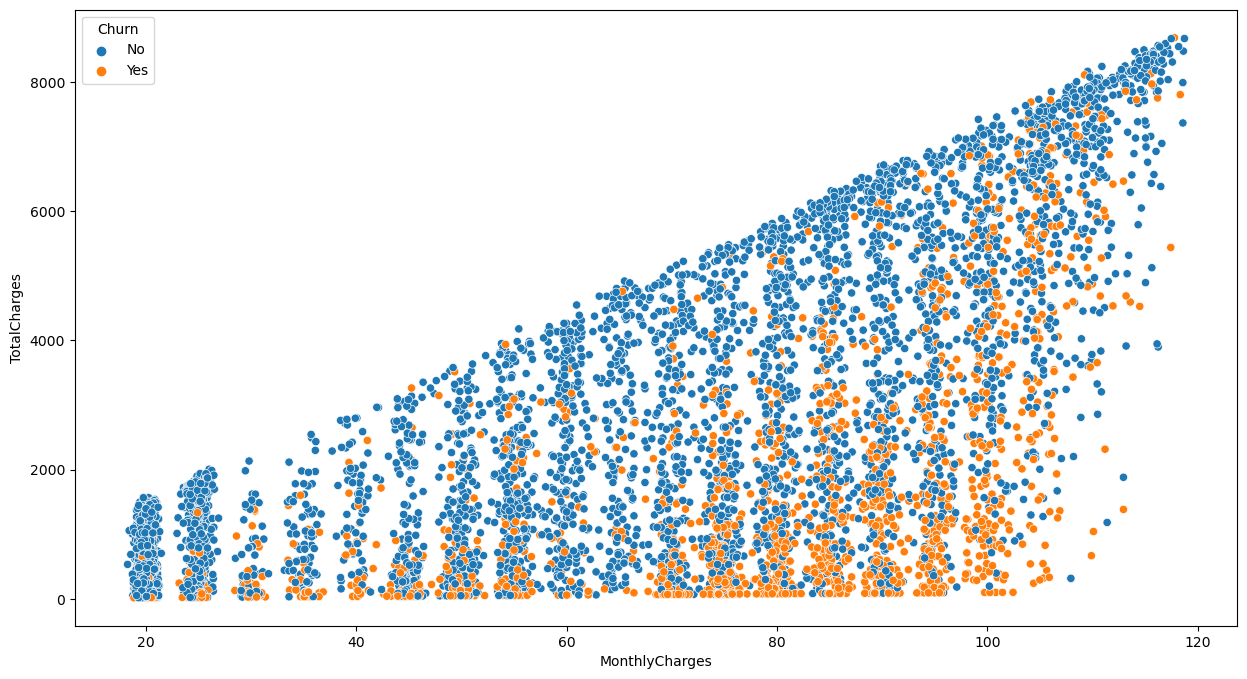

In [43]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=data);

Here we can see with increase in monthly charge and at low values of total charges churn is more likely to happen.

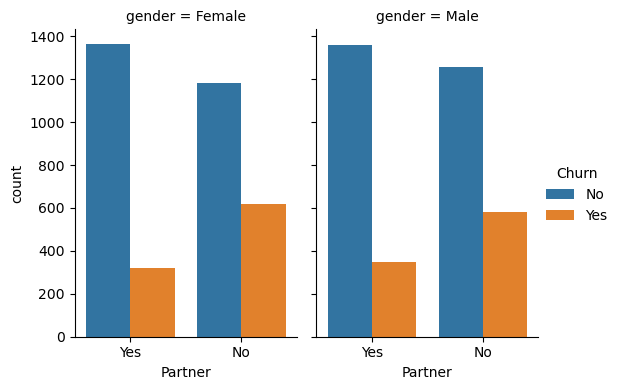

In [44]:
sns.catplot(x="Partner", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

Here we can say Male and female customers having no partner are more likely to churm.

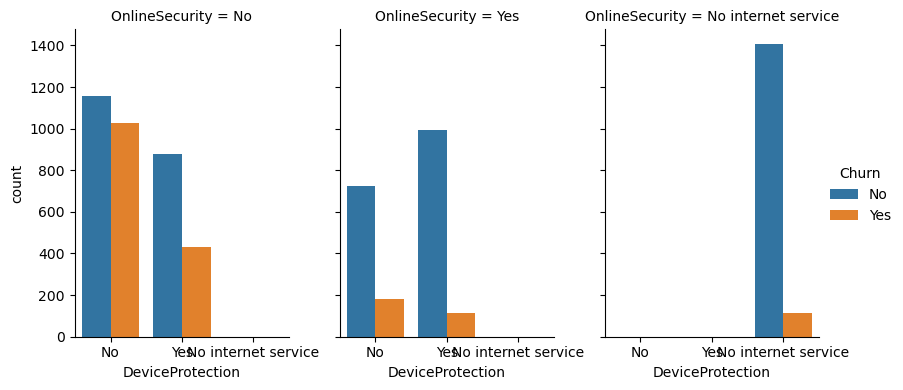

In [45]:
sns.catplot(x="DeviceProtection", hue="Churn", col="OnlineSecurity",data=data, kind="count",height=4, aspect=.7)

Here we can see Customers not having Online security and device protection , are more likely to churn.

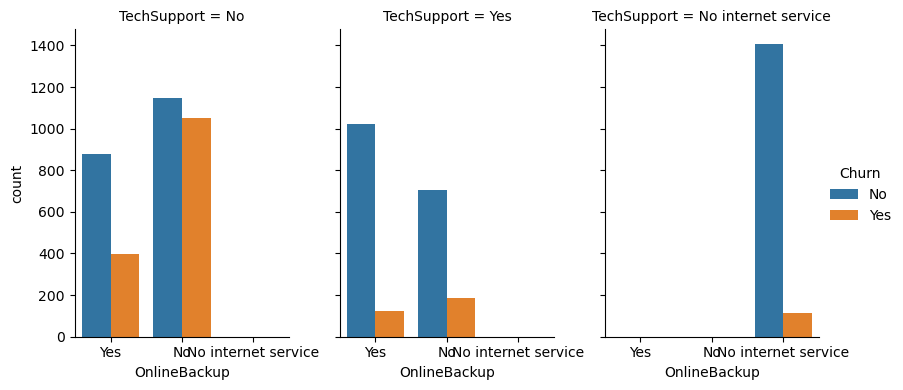

In [46]:
sns.catplot(x="OnlineBackup", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

Here we can see customers with no online backup and without any technical support are more likly to churn.

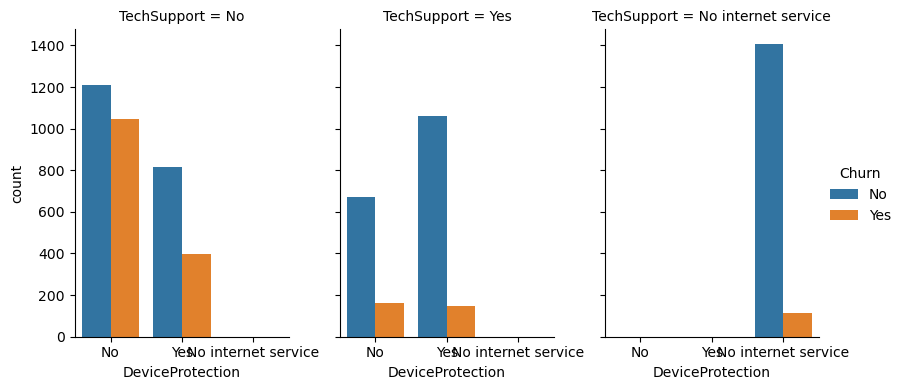

In [47]:
sns.catplot(x="DeviceProtection", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

Customers without any device Protection and Techsupport are more likely to churn.

Pepole with device protection and witout tech support are also more likely to churn.

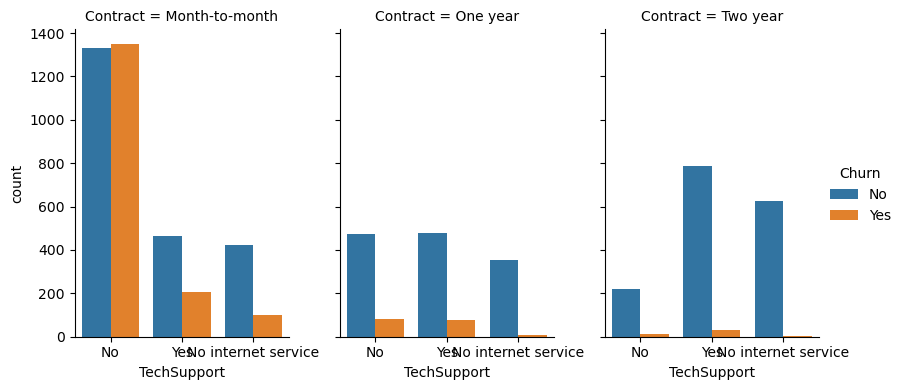

In [48]:
sns.catplot(x="TechSupport", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)

Here we can see customers with monthly contract and without any technical support are more likely to Churn.
we can also say that for month to month contract, technical support is less.
Due to less technical support Customers are more likely to churn.

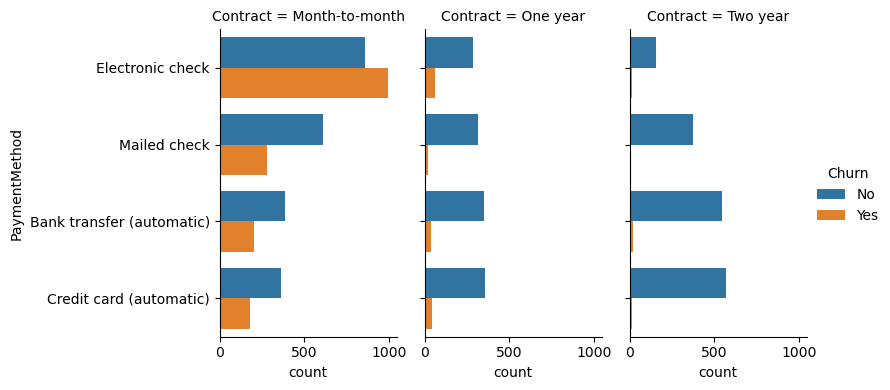

In [49]:
sns.catplot(y="PaymentMethod", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)

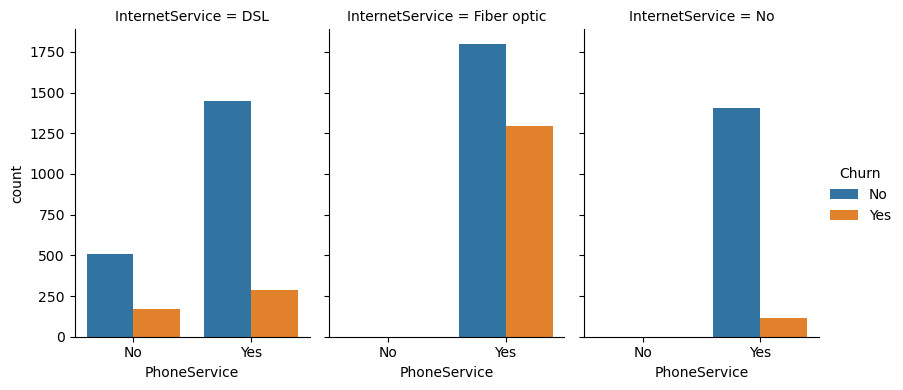

In [50]:
sns.catplot(x="PhoneService", hue="Churn", col="InternetService", data=data, kind="count",height=4, aspect=.7)

Customers with Phone service and Internet as Fiber optics are more likely to churn.

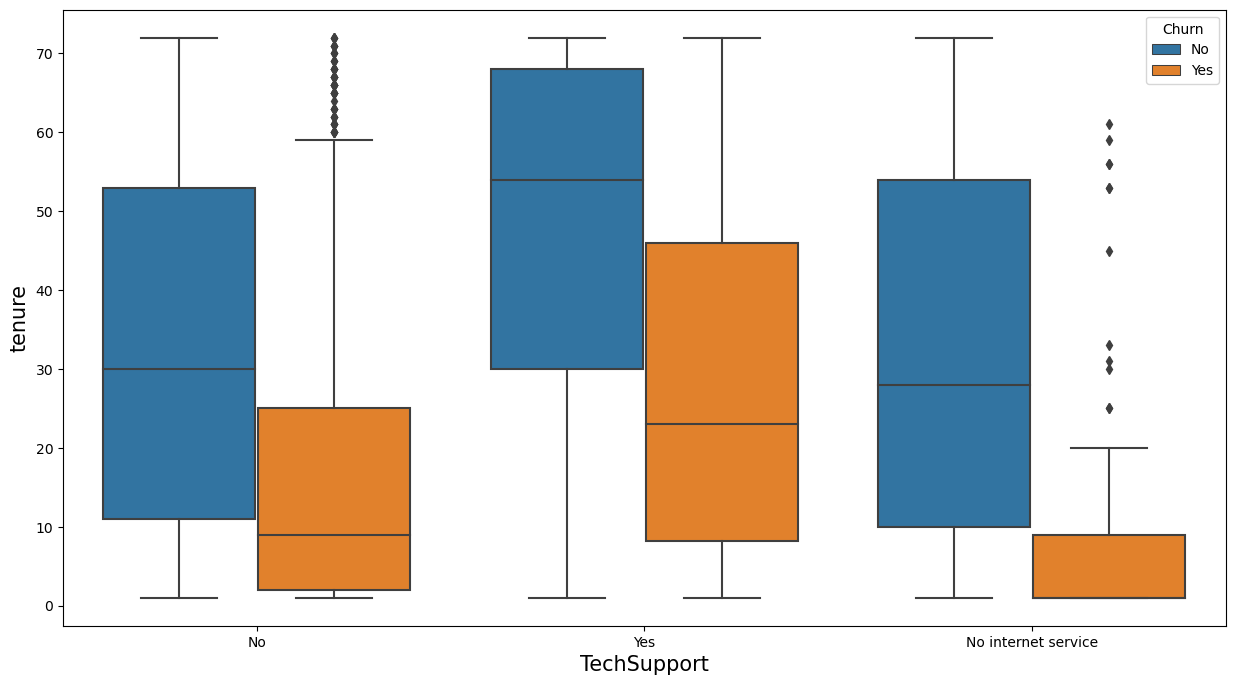

In [52]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='tenure', x='TechSupport',hue='Churn' ,data= data)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

From Box plot we can see without any tech support the tennure is less and there is high chances of churn at less tenure.

Customers opted for techsupport are more likely to stay with the company.

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

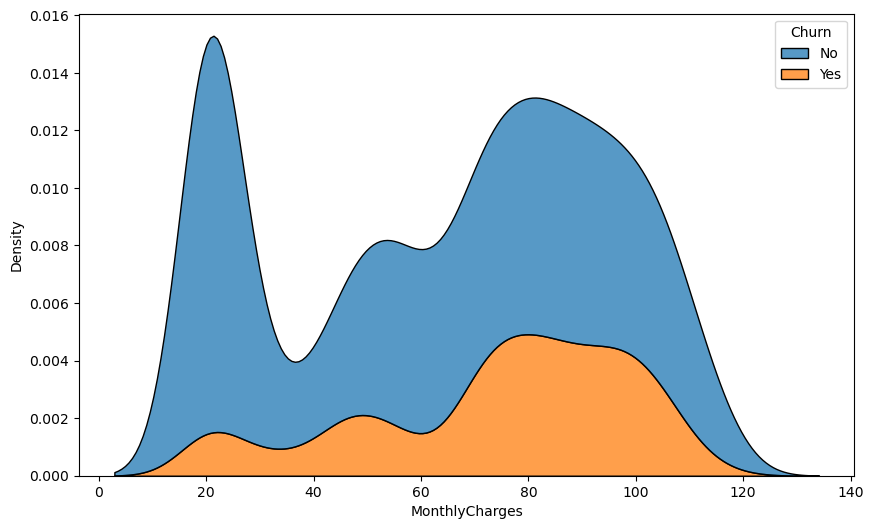

In [53]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="MonthlyCharges", hue="Churn", multiple="stack")

We can see churn is high as the monthly charges increase.

<AxesSubplot: xlabel='TotalCharges', ylabel='Density'>

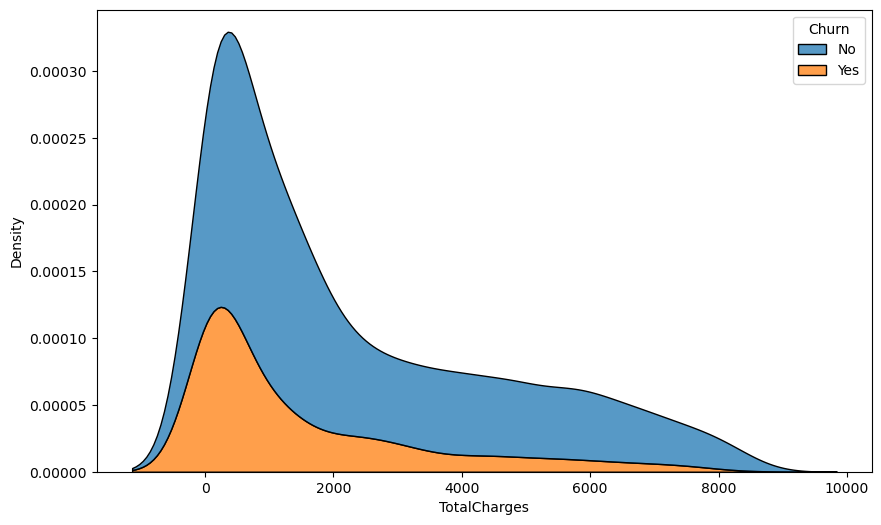

In [54]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="TotalCharges", hue="Churn", multiple="stack")

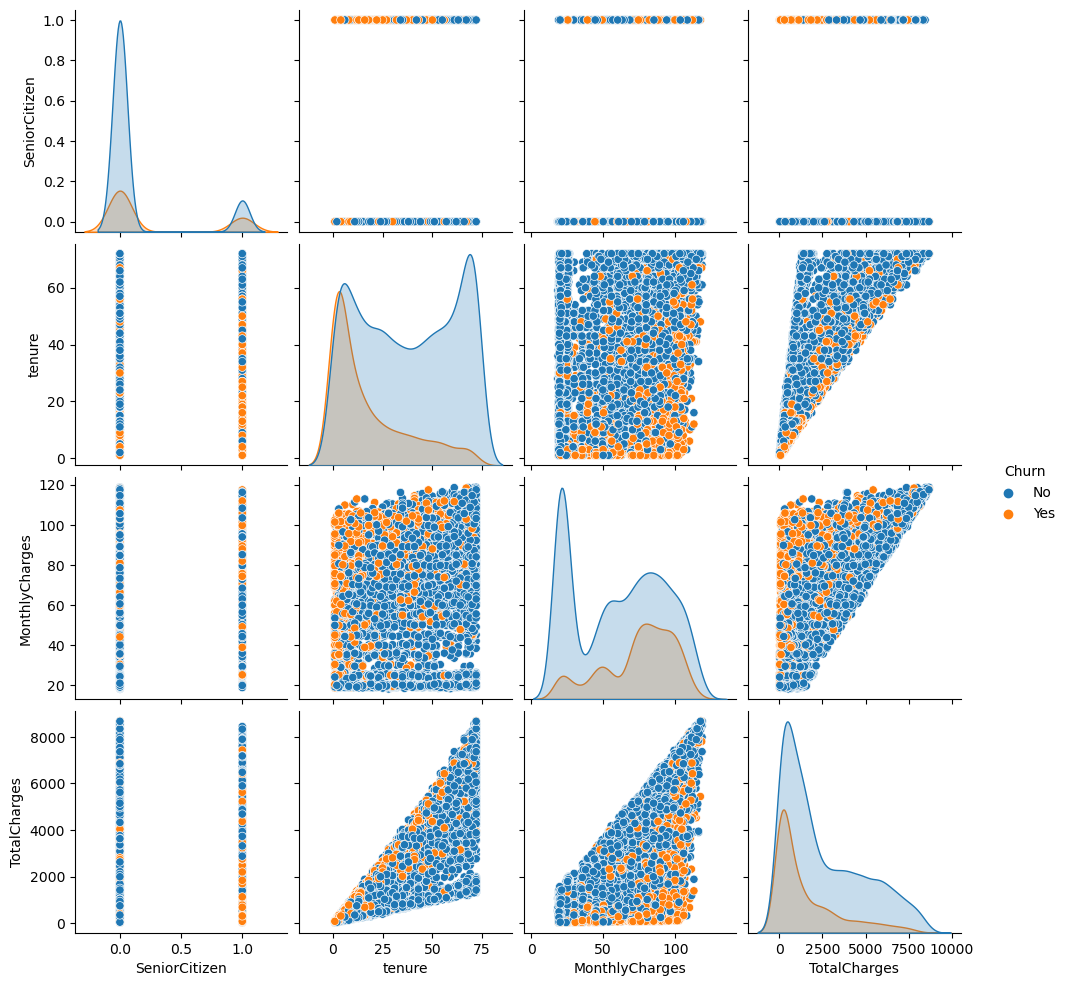

In [55]:
sns.pairplot(data=data, hue='Churn')

From the pair plot we can predict Senior Citizen are more likely to churn

# Data Preprocessing
In this step we will process our data to make it standard for our model.

In [56]:
feature=data.drop('Churn', axis=1)
target= data['Churn']

In [57]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )
data_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [58]:
data_new.shape

(7032, 30)

After applyign one hot encoder, now our data changes into 7032 rows and 30 columns.

For Target column lets imort label encoder

In [59]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)
data_new['Churn']= Target
data_new.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


Now curn is added to the new dataframe.

In [60]:
## Lets check Correlation
data_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,-0.182519,-0.182519,-0.038576,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,0.017930,-0.037529,-0.037529,0.328297,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,-0.763191,-0.763191,0.296447,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,-0.374878,-0.374878,0.412619,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,-0.171817,0.052133,-0.171817,0.070076,-0.171817,0.095138,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,-0.210794,-0.210794,0.098592,-0.210794,0.202228,-0.210794,0.201733,-0.210794,0.100421,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


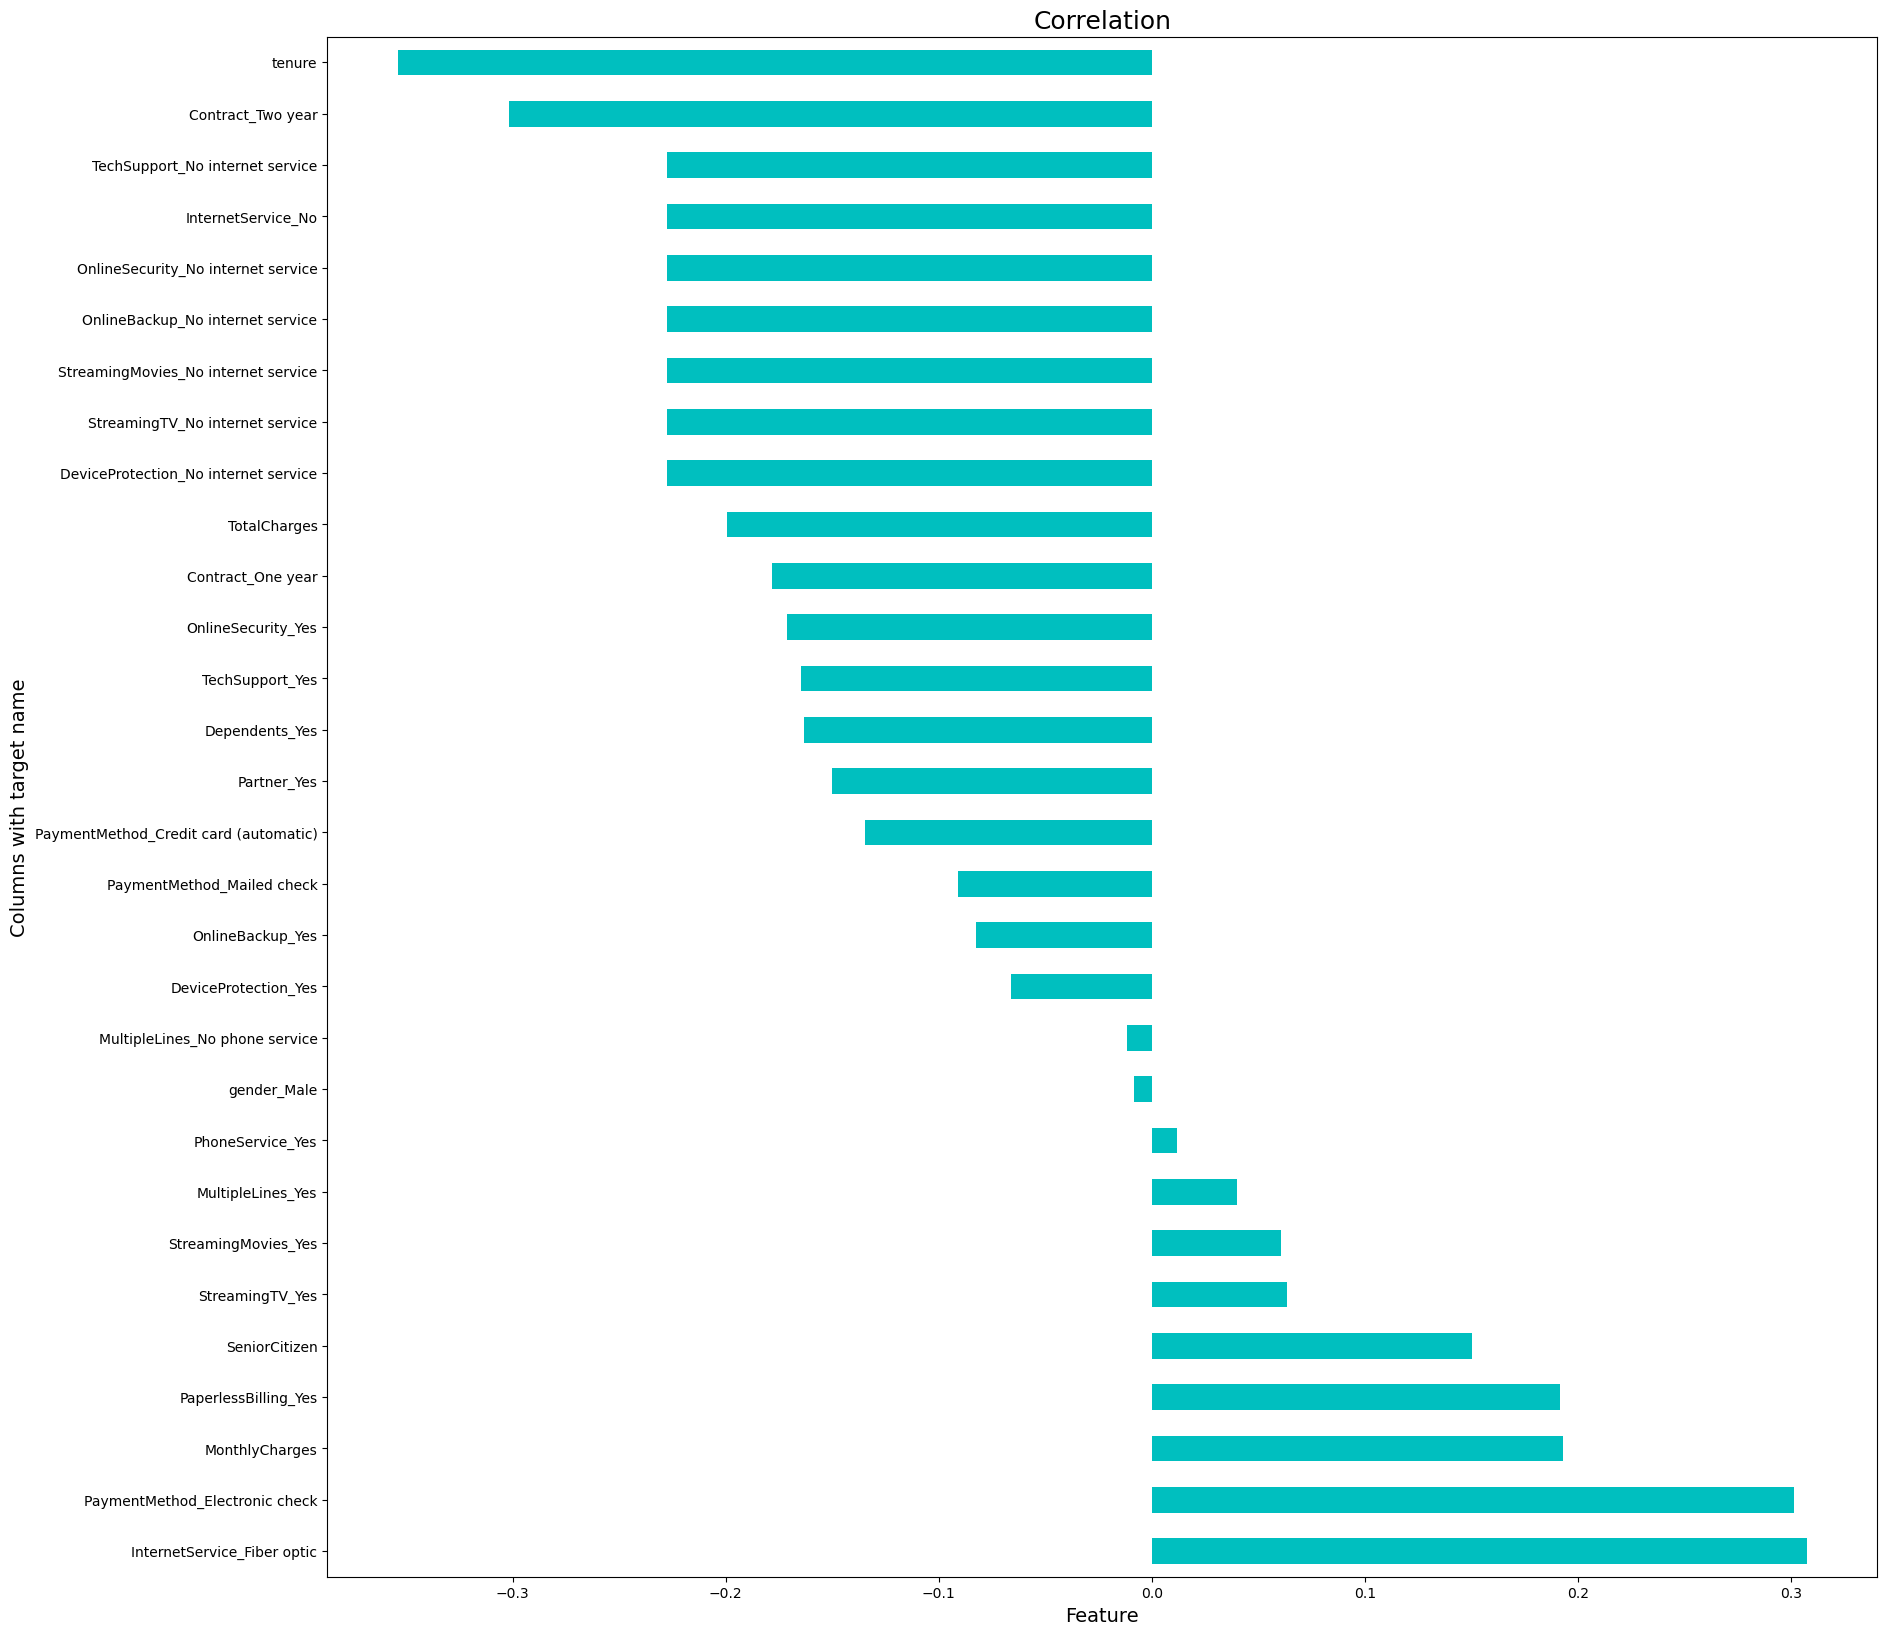

In [61]:
plt.figure(figsize=(20,20))
data_new.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

All the columns on the left of 0.0 are having negative correlation and columns on Right of 0.0 are having positive correlation

# Checking Outliers

<AxesSubplot: >

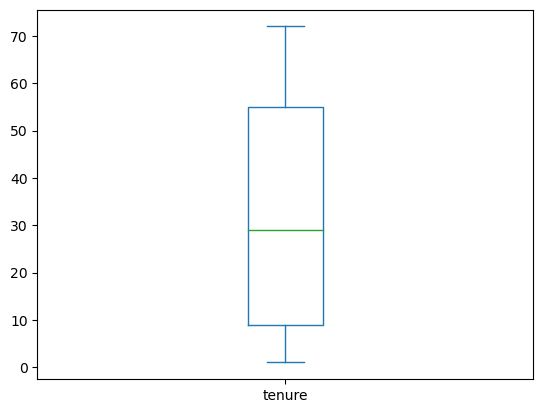

In [62]:
data_new['tenure'].plot.box()

<AxesSubplot: >

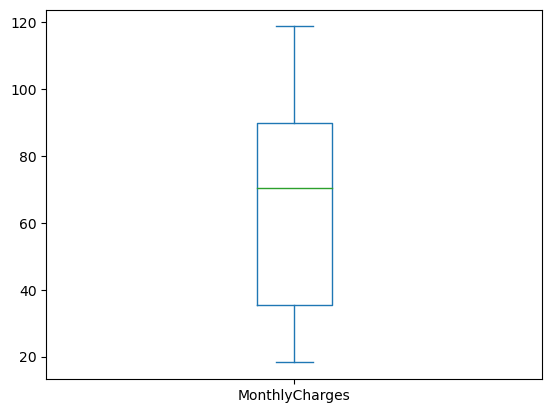

In [63]:
data_new['MonthlyCharges'].plot.box()

<AxesSubplot: >

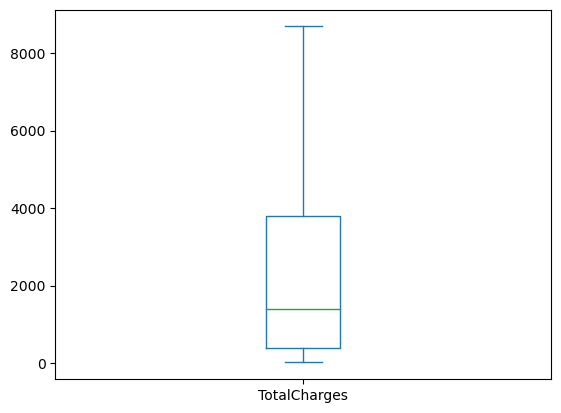

In [64]:
data_new['TotalCharges'].plot.box()

Here we can see our contineous columns not having any outliers.

# Checking Skewness
Here we will check skewness only for contineous data, not for categorical data.

In [65]:
data.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

SeniorCitizen and TotalCharges are aving skewness

# Removing Skewness from the data

In [66]:
data_new['TotalCharges'] = np.sqrt( data_new['TotalCharges'] )

# Scaling the data Using StandardScaler.

In [67]:
# Dividing into Feature and Target data
x=data_new.drop(['Churn'],axis=1)
y=data_new['Churn']


In [68]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)


Here we can see our output is not balanced we will now use SMOTE to balance the output.


In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)
X_train_over.shape

Y_train_over.shape

Y_train_over.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [71]:
data_new.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [72]:
dfx=pd.DataFrame(data=X_train_over, columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

In [73]:
dfx

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-1.448158,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.52513,-0.52513,-0.633746,-0.52513,1.378330,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,0.100539,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-1.247016,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,1.378330,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,0.077540,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,1.564308,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-1.168976,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.440327,0.277862,1.368079,0.957441,0.666113,1.035617,-0.652305,0.327189,-0.327189,1.170500,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,1.564308,-0.52513,1.265525,-0.52513,1.254943,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,-0.543604
10322,-0.440327,-1.277889,0.514394,-1.298558,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,1.265525,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
10323,-0.440327,-0.088239,0.467473,0.274179,0.990658,1.035617,1.533025,0.327189,-0.327189,-0.854336,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,1.265525,-0.52513,-0.796849,-0.514537,-0.561364,-1.206361,-0.525351,1.404764,-0.543604
10324,-0.440327,-0.182346,0.806573,0.398848,0.850169,1.035617,1.533025,0.327189,-0.327189,1.170500,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,1.254943,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604


# VIF Calculation

In [74]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.155419
1,tenure,18.600744
2,MonthlyCharges,897.862817
3,TotalCharges,23.512521
4,gender_Male,1.004794
5,Partner_Yes,1.506766
6,Dependents_Yes,1.416836
7,PhoneService_Yes,inf
8,MultipleLines_No phone service,inf
9,MultipleLines_Yes,8.070450


In [76]:
dfx.drop(['PhoneService_Yes'],axis=1, inplace= True)


In [77]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.155419
1,tenure,18.600744
2,MonthlyCharges,897.862817
3,TotalCharges,23.512521
4,gender_Male,1.004794
5,Partner_Yes,1.506766
6,Dependents_Yes,1.416836
7,MultipleLines_No phone service,38.316482
8,MultipleLines_Yes,8.070450
9,InternetService_Fiber optic,173.643191


In [78]:
dfx.drop(['InternetService_No'],axis=1, inplace= True)
dfx.drop(['OnlineSecurity_No internet service'],axis=1, inplace= True)
dfx.drop(['OnlineBackup_No internet service'],axis=1, inplace= True)
dfx.drop(['DeviceProtection_No internet service'],axis=1, inplace= True)
dfx.drop(['TechSupport_No internet service'],axis=1, inplace= True)
dfx.drop(['StreamingTV_No internet service'],axis=1, inplace= True)
dfx.drop(['MonthlyCharges'],axis=1, inplace= True)
dfx.drop(['TotalCharges'],axis=1, inplace= True)

As we can see VIF is less than 10 we will not remove any columns, and proceed further.

In [79]:
dfx.head()

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.009430,1.035617,-0.652305,3.056334,-0.854336,-0.886896,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,0.990658,-0.965608,-0.652305,3.056334,-0.854336,-0.886896,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,-1.009430,-0.965608,-0.652305,-0.327189,-0.854336,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604


In [80]:
x=dfx
y=Y_train_over

# Model Design

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Chosing Best Random State

In [82]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  4 The Model performing Well
At Random State 4
Training Accuracy score is- 77.82082324455206
Testing Accuracy Score is- 77.78315585672799
At Random state  57 The Model performing Well
At Random State 57
Training Accuracy score is- 77.77239709443099
Testing Accuracy Score is- 77.78315585672799
At Random state  60 The Model performing Well
At Random State 60
Training Accuracy score is- 77.68765133171914
Testing Accuracy Score is- 77.73475314617619
At Random state  87 The Model performing Well
At Random State 87
Training Accuracy score is- 77.79661016949152
Testing Accuracy Score is- 77.78315585672799
At Random state  88 The Model performing Well
At Random State 88
Training Accuracy score is- 77.8087167070218
Testing Accuracy Score is- 77.78315585672799
At Random state  107 The Model performing Well
At Random State 107
Training Accuracy score is- 77.8087167070218
Testing Accuracy Score is- 77.78315585672799
At Random state  110 The Model performing Well
At Random State 110

In [83]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=653,test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.7836398838334947


In [84]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[780 234]
 [213 839]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1014
           1       0.78      0.80      0.79      1052

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



# Cross validation of model.

In [85]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 77.61960100716638
Accuracy Score:- 78.36398838334947


at cv:- 3
Cross Validation scre is:- 77.70675963587061
Accuracy Score:- 78.36398838334947


at cv:- 4
Cross Validation scre is:- 77.78440195301961
Accuracy Score:- 78.36398838334947


at cv:- 5
Cross Validation scre is:- 77.6487064873696
Accuracy Score:- 78.36398838334947


at cv:- 6
Cross Validation scre is:- 77.5614952546969
Accuracy Score:- 78.36398838334947


at cv:- 7
Cross Validation scre is:- 77.66799871388544
Accuracy Score:- 78.36398838334947


at cv:- 8
Cross Validation scre is:- 77.67799134136749
Accuracy Score:- 78.36398838334947


at cv:- 9
Cross Validation scre is:- 77.64904389609346
Accuracy Score:- 78.36398838334947




 At cv:7 Cross val score and Accuracy Score are having very less diffrence, Over model is perfoming well.

# SVC

In [86]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 81.945788964182
Cross val Score : 81.57100861565516


In [87]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[799 215]
 [158 894]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1014
           1       0.81      0.85      0.83      1052

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Accuracy_core: 81.

Cross val Score : 81.

Both score having good Accuracy. Model perfoming well. Lets try another model.


# Ensemble Techniques

## KNeighborsClassifier

In [88]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 79.57405614714425
Cross val Score : 79.76964769647695


In [89]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[688 326]
 [ 96 956]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1014
           1       0.75      0.91      0.82      1052

    accuracy                           0.80      2066
   macro avg       0.81      0.79      0.79      2066
weighted avg       0.81      0.80      0.79      2066



accuracy_score: 79.

Cross val Score : 79

Both the score having considerable diffrence in score, model is not prforming well.

lets try another model

# DecisionTreeClassifier

In [90]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 78.1703775411423
Cross val score is: 78.77286954467608


In [91]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[794 220]
 [231 821]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1014
           1       0.79      0.78      0.78      1052

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



accuracy_score 78

Cross val score is: 78

Both score are less aas compare to SVC.

SVC is still our best model.

# RandomForestClassifier

In [92]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  84.65634075508228
Cross val Score : 85.33873370210699


In [93]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[861 153]
 [164 888]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1014
           1       0.85      0.84      0.85      1052

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



accuracy_score:84
Cross val Score : 85
Model score is good, but diffrence in cv score and accuracy is high, stil svc is our best model.

# AdaBoostClassifier


In [94]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  80.97773475314618
Cross val Score : 80.58327919840941


In [95]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[784 230]
 [163 889]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1014
           1       0.79      0.85      0.82      1052

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



accuracy_score:80.97
Cross val Score :80.58
Both the score having less diffrence, but still Svc is performing well.

# GaussianNB


In [96]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 77.78315585672799
Cross Val Score is : 76.83517392074648


In [97]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[743 271]
 [188 864]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1014
           1       0.76      0.82      0.79      1052

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



Model score is less as compare to SVC, SVC is still best model

### SVC and AdaBoostClassifier are having good accurcay and performance, lets try hyper parameter tuning for both.


# Hyperparameter Tuning of the model.

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[20,30,40,50,100,150],'learning_rate':[0.0001,0.001,0.01],'algorithm':['SAMME', 'SAMME.R'],'random_state':[10,20,30,40,50,75]}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad, param_grid=parameters, n_jobs=-1)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 150, 'random_state': 10}


In [99]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.01, n_estimators= 150, random_state=10)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  76.76669893514037
Cross val Score : 75.33419949211599


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 2.5, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [101]:
scv=SVC(C=2.5, gamma='scale', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 81.945788964182
Cross val Score : 81.57100861565516


SVC with Accuracy_core:  Cross val Score :  is our best model.

# AUC ROC Curve:

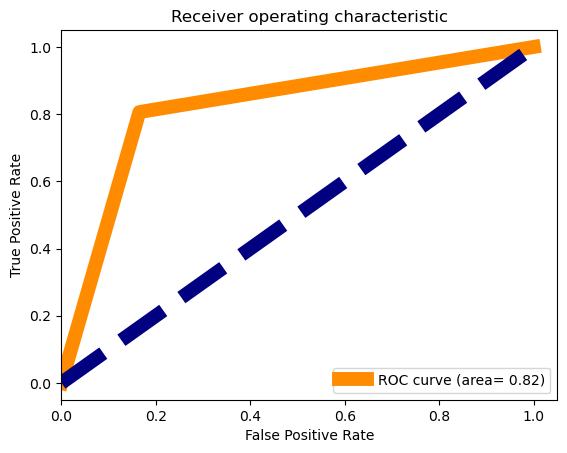

In [102]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:
# Saving Best Model
import pickle
filename="Evaluation_Project_Customer_Churn_Analysis.pkl "
pickle.dump(svc, open(filename,'wb'))


In [104]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2061,0,0
2062,0,0
2063,1,1
2064,0,0
